<a href="https://colab.research.google.com/github/thj3a/Travelling-Sales-wo-man-Problem/blob/main/Travelling_Sales(wo)man_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from itertools import permutations
from math import inf

In [ ]:
def gera_pontos(n_pontos, limite = 10, dim=2):
  pontos = []
  for i in range(n_pontos):
    pontos.append(np.random.randint(1,limite+1,dim))
  return pontos

In [ ]:
def computa_distancia(a,b):
  return np.sqrt(np.sum(np.square(a-b)))

In [ ]:
def constroi_matriz_distancias(amostra):
  M = np.zeros((len(amostra),len(amostra)))
  for i in range(len(amostra)):
    for j in range(len(amostra)):
      M[i][j] = computa_distancia(amostra[i],amostra[j])
  return M

In [ ]:
def permuta(s, tipo=2):
  if tipo == 1:
    perm = permutations(s)
    perm = list(perm)
    i = np.random.randint(0,len(perm))
    return perm[i]

  i = np.random.randint(0,len(s))
  j = np.random.randint(0,len(s))
  while i==j or abs(i-j)<2:
    j = np.random.randint(0,len(s))
  if i>j:
    i = i+j
    j = i-j
    i = i-j
  if tipo == 2:
    return np.concatenate((s[0:i+1], s[i+1:j][::-1], s[j:]))
  if tipo == 3:
    return np.concatenate((s[0:i], [s[j]], s[i+1:j], [s[i]],s[j+1:]))

In [ ]:
def computa_custo_caminho(s):
  result = 0
  for i in range(len(s)-1):
    result += M_dist[int(s[i]-1)][int(s[i+1]-1)]
  return result

In [ ]:
def computa_boltzman(a,b,T):
  return np.exp((computa_custo_caminho(a)-computa_custo_caminho(b))/T)

In [ ]:
def computa_passo(s_ini, T):
  s_fim = permuta(s_ini)
  r = computa_boltzman(s_ini,s_fim, T)
  if r >= 1:
    return s_fim
  u = np.random.uniform()
  if u <= r:
    return s_fim
  else:
    return s_ini

[[ 0. 45.  8. ... 61. 84. 27.]
 [45.  0. 37. ... 16. 39. 18.]
 [ 8. 37.  0. ... 53. 76. 19.]
 ...
 [61. 16. 53. ...  0. 23. 34.]
 [84. 39. 76. ... 23.  0. 57.]
 [27. 18. 19. ... 34. 57.  0.]]
[ 70  52  53  15  35  93  66  88  84   3  98  99   2  50  17  58  12  61
  33  73  40  47   6  95  90  34  97  45  44   5  23  48  91  76  27  18
  81  30  74  64  75  82  29  13  94  41  72  71  11   9  16  87  28  78
  63  43  25  20  55  89  77  54  56  22  10   8 100   1  51  36  69  67
  24  14  37  39  62  80   4  38  79  60  57  19  49  92  86   7  21  85
  59  26  96  65  32  42  83  46  68  31]
1 3511.0 10000
2 3481.0 9900.0
3 3443.0 9801.0
4 3359.0 9702.99
5 3325.0 9605.9601
337 3315.0 341.52726856212337
339 3311.0 334.7308759177372
349 3303.0 302.72460413199775
384 3295.0 212.95092499631087
386 3269.0 208.7132015888843
387 3239.0 206.62606957299545
388 3203.0 204.5598088772655
389 3165.0 202.51421078849285
395 3141.0 190.66310942897582
397 3083.0 186.86891355133923
398 3079.0 185.000224

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


725.0 0.00014924641689970317
1817 701.0 0.00011844408823424026
1818 691.0 0.00011725964735189786
1851 677.0 8.416082914616353e-05
1900 645.0 5.143213358460055e-05
1908 643.0 4.74587283882982e-05
1920 631.0 4.206669887427232e-05
1927 627.0 3.920891232154721e-05
1974 617.0 2.4447752538547158e-05
2010 589.0 1.7025738019449258e-05
2024 555.0 1.4791038613698139e-05
2057 553.0 1.0615980021891214e-05
2076 541.0 8.770589605351945e-06
2132 537.0 4.99573838564214e-06
2157 535.0 3.885792022322668e-06
2348 525.0 5.699040200396169e-07
2353 513.0 5.419730524556859e-07
2363 505.0 4.901507137787288e-07
2436 499.0 2.3534167765324058e-07
2459 495.0 1.867705169222726e-07
2463 493.0 1.7941101334117252e-07
2504 483.0 1.1882069209059643e-07
2550 479.0 7.483607975458062e-08
2576 469.0 5.7627010273942744e-08
2763 461.0 8.798476500486472e-09
2832 451.0 4.397804361641056e-09
2834 449.0 4.310288054844399e-09
2861 435.0 3.2859166953479763e-09
2874 429.0 2.8834609799911443e-09
2883 427.0 2.6340913376679915e-09
288

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


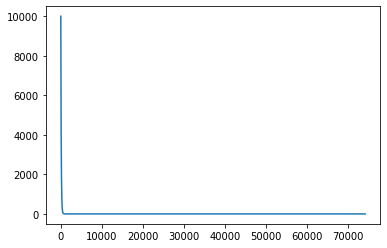

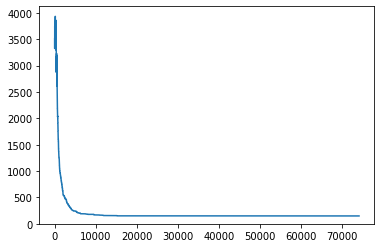

0.0
[ 70  66  77  23  33  48  44  95  45  76   9  29  79  28  53  51   5  69
  18  85  99  54  42  12  47  75   6  25  68  96  86  13  61  14  64  98
  10  91  56   7  27   2  32  90  58  89  15  52  40   4  30  35  50  84
  36  71  92  26  34  67  20 100  82  19  16  80  22  39  73  37  87  43
  78  11  46  93  38  81  60   3  24  49  17  21  83  57  94   1   8  97
  59  62  88  74  72  41  63  55  65  31]


In [ ]:
from os import replace
def markov_caxeiro_viajante(s, T_zero,limite_iters=10**5, tipo_beta = "linear", beta=0.5):
  best = inf
  iters=0
  T = T_zero
  hist_t = []
  hist_custo = []
  while T>0 and iters<limite_iters:
    iters+=1
    s = computa_passo(s,T)
    custo_s = computa_custo_caminho(s)
    hist_t.append(T)
    hist_custo.append(custo_s)
    if custo_s < best:
      best = custo_s
      print(iters, best, T)
    if tipo_beta == "linear":
      T = T_zero - beta*iters
    if tipo_beta == "log":
      T = T_zero/np.log(iters+beta)
    if tipo_beta == "exp":
      T = T_zero*beta**iters
  plt.plot(range(iters), hist_t)
  plt.show()
  plt.plot(range(iters), hist_custo)
  #plt.plot(range(iters), [best for i in range(iters)])
  plt.ylim(bottom=0)
  plt.show()
  print(T)
  print(s)

amostra = gera_pontos(n_pontos=100,limite=100, dim=1)
#plt.scatter([amostra[i][0] for i in range(len(amostra))], [amostra[i][1] for i in range(len(amostra))])
plt.show()

M_dist = constroi_matriz_distancias(amostra)
print(M_dist)

s_inicial = np.random.permutation(range(1,len(amostra)+1))  # randint(1,len(amostra)+1,100, replace=False)
print(s_inicial)
markov_caxeiro_viajante(s_inicial, T_zero=10**4, limite_iters=2*10**6, tipo_beta="exp", beta=0.99)